# Регрессионная нейронная сеть

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Импортируем наш датасет
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [3]:
#Проводим шкалирование.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [4]:
#!pip install tensorflow
#!pip install keras

import keras
from keras.models import Sequential
from keras.layers import Dense

In [5]:
#Прописываем структуру нашей сети (стоит отметить, что структура, которая описана ниже была получена экспериментальным путём)
rnn = Sequential()

#Добавляем исходный слой. На входе 8 нейронов.У нас нейронная сеть с расширением. Выбранная функция-тангенс, так как нам подходит диапазон ёё изменения.
rnn.add(Dense(10, activation = 'tanh', input_dim = 8))

#Добавляем 2 слой.
rnn.add(Dense(6, activation = 'tanh'))

#И добавляем последний слой.
rnn.add(Dense(1, activation = 'linear'))

rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [6]:
#Проводим обучение.
rnn.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
136/136 [==============================] - 1s 585us/step - loss: 1.2581 - accuracy: 0.0000e+00
Epoch 2/100
136/136 [==============================] - 0s 542us/step - loss: 0.8964 - accuracy: 0.0000e+00
Epoch 3/100
136/136 [==============================] - 0s 548us/step - loss: 0.8186 - accuracy: 0.0000e+00
Epoch 4/100
136/136 [==============================] - 0s 601us/step - loss: 0.7760 - accuracy: 0.0000e+00
Epoch 5/100
136/136 [==============================] - 0s 588us/step - loss: 0.7517 - accuracy: 0.0000e+00
Epoch 6/100
136/136 [==============================] - 0s 537us/step - loss: 0.7348 - accuracy: 0.0000e+00
Epoch 7/100
136/136 [==============================] - 0s 569us/step - loss: 0.7196 - accuracy: 0.0000e+00
Epoch 8/100
136/136 [==============================] - 0s 576us/step - loss: 0.7085 - accuracy: 0.0000e+00
Epoch 9/100
136/136 [==============================] - 0s 547us/step - loss: 0.7010 - accuracy: 0.0000e+00
Epoch 10/100
136/136 [===============

Epoch 77/100
136/136 [==============================] - 0s 524us/step - loss: 0.5461 - accuracy: 0.0000e+00
Epoch 78/100
136/136 [==============================] - 0s 551us/step - loss: 0.5458 - accuracy: 0.0000e+00
Epoch 79/100
136/136 [==============================] - 0s 526us/step - loss: 0.5437 - accuracy: 0.0000e+00
Epoch 80/100
136/136 [==============================] - 0s 513us/step - loss: 0.5441 - accuracy: 0.0000e+00
Epoch 81/100
136/136 [==============================] - 0s 502us/step - loss: 0.5441 - accuracy: 0.0000e+00
Epoch 82/100
136/136 [==============================] - 0s 556us/step - loss: 0.5399 - accuracy: 0.0000e+00
Epoch 83/100
136/136 [==============================] - 0s 519us/step - loss: 0.5400 - accuracy: 0.0000e+00
Epoch 84/100
136/136 [==============================] - 0s 505us/step - loss: 0.5372 - accuracy: 0.0000e+00
Epoch 85/100
136/136 [==============================] - 0s 519us/step - loss: 0.5360 - accuracy: 0.0000e+00
Epoch 86/100
136/136 [======

In [7]:
y_pred = rnn.predict(X_test)

In [8]:
#Обратно шкалируем данные.
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [9]:
#Находим среднеквадратические ошибки. Сеть немного переобучена.
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(11.566, 13.911)

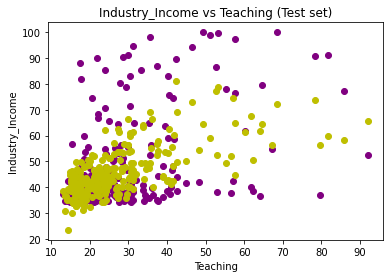

In [11]:
#Визуализация.
plt.scatter(X_test[:,5], y_test, color = 'purple')
plt.plot(X_test[:,5], y_hat, 'yo')
plt.title('Industry_Income vs Teaching (Test set)')
plt.xlabel('Teaching')
plt.ylabel('Industry_Income')
plt.show()

Вывод: построив все модели и сравнив результаты, я смело могу сказать, что пока наиболее оптимальным методом является Catboost, так как именно там мы имеем самые низкие среднеквадратические ошибки (11.34 и 13.18) и моедль наименее переобучена. Также там имеем самое высокое значение коэффициента детерминации 0.51.